In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/JE_h09.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/KL_f12.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/DC_h03.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/DC_d04.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/KL_a14.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/JE_f01.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/KL_h15.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/JK_su02.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/JK_a06.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/DC_n01.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/DC_f01.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/JK_n22.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/KL_a10.wav
/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/JE

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import sys

#importing music libraries
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

import warnings
if not sys.warnoptions:
  warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)
import tensorflow as tf
print("Done")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Done


In [3]:
#preparing data set

ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21', 'Actor_01', 'Actor_11', 'Actor_20', 'Actor_08', 'Actor_15', 'Actor_06', 'Actor_12', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_04', 'Actor_19', 'Actor_10', 'Actor_09', 'Actor_14', 'Actor_03', 'Actor_13', 'Actor_18', 'Actor_07']


In [4]:
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [5]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)

In [6]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-06-02-01-01-07.wav
03
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-08-01-01-01-02.wav
5
03-01-05-02-01-02-07.wav


In [7]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

   Emotions                                               Path
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
______________________________________________
     Emotions                                               Path
1435     fear  /kaggle/input/ravdess-emotional-speech-audio/a...
1436    angry  /kaggle/input/ravdess-emotional-speech-audio/a...
1437      sad  /kaggle/input/ravdess-emotional-speech-audio/a...
1438  disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
1439    angry  /kaggle/input/ravdess-emotional-speech-audio/a...
_______________________________________________
Emotions
neutral     288
surprise    192
disgust     192
fear        192
sad         192
happy       192
angry       192
Name: count, dty

In [8]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
disgust    1271
happy      1271
sad        1271
fear       1271
angry      1271
neutral    1087
Name: count, dtype: int64


In [9]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

Emotions
fear        400
angry       400
disgust     400
neutral     400
sad         400
surprise    400
happy       400
Name: count, dtype: int64


In [10]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        file_emotion.append('angry')
    elif ele == 'd':
        file_emotion.append('disgust')
    elif ele == 'f':
        file_emotion.append('fear')
    elif ele == 'h':
        file_emotion.append('happy')
    elif ele == 'sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')


#dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns = ['Emotions'])

# dataframe for path of files
path_df = pd.DataFrame(file_path, columns = ['Path'])
Savee_df = pd.concat([emotion_df, path_df])
Savee_df.head()
print(Savee_df.Emotions.value_counts())

Emotions
surprise    180
happy        60
fear         60
disgust      60
angry        60
sad          60
Name: count, dtype: int64


In [11]:
# creating Dataframe using all the 4 dataframes
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv", index=False)
data_path.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


In [12]:
print(data_path.Emotions.value_counts())

Emotions
disgust     1923
fear        1923
sad         1923
happy       1923
angry       1923
neutral     1775
surprise     772
Name: count, dtype: int64


In [13]:
print(data_path['Emotions'].unique())

['surprise' 'neutral' 'disgust' 'fear' 'sad' 'happy' 'angry' nan]


In [14]:
data_path['Emotions']

0      surprise
1       neutral
2       disgust
3       disgust
4       neutral
         ...   
475         NaN
476         NaN
477         NaN
478         NaN
479         NaN
Name: Emotions, Length: 12642, dtype: object

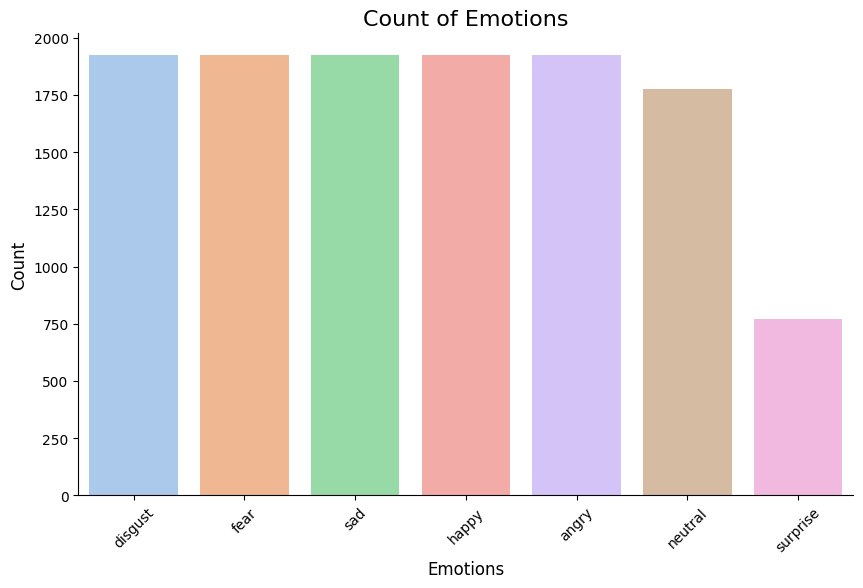

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each emotion
emotion_counts = data_path['Emotions'].value_counts()

# Plot the colored bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='pastel')
plt.title('Count of Emotions', size=16)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [16]:
#  Sampling rate is the number of samples of audio carried per second
data, sr = librosa.load(file_path[0])
sr
# sr is 22050, it means that 22050 audio samples are taken in one second. A higher sampling rate allows for more accurate representation of the audio waveform but also results in larger data size

22050

In [17]:
# it creates an audio widget that allows you to play the audio directly in the Jupyter notebook or any environment that supports IPython's display.
ipd.Audio(data, rate = sr)

The Mel spectrogram is a representation of the short-term power spectrum of a sound, where the frequencies are converted to the Mel scale, which is a perceptual scale of pitches. It is computed by dividing the audio signal into short overlapping frames and applying the Discrete Fourier Transform (DFT) to each frame.

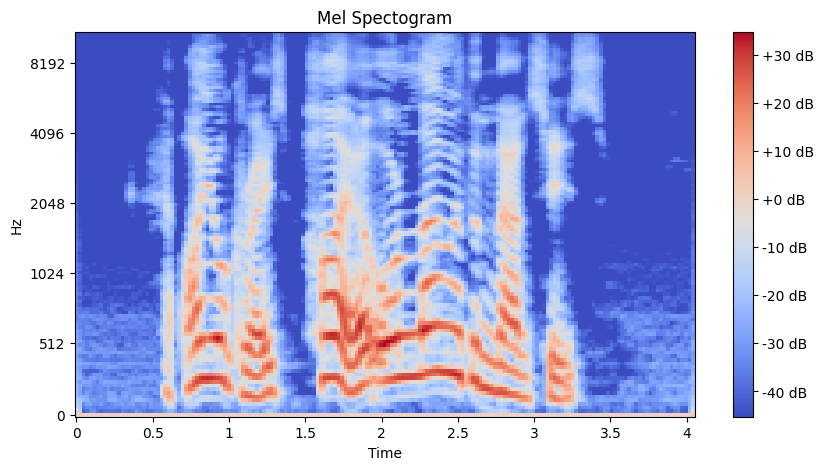

In [18]:
# create log mel spectogram
plt.figure(figsize = (10, 5))
spectogram = librosa.feature.melspectrogram(y = data, sr=sr, n_mels=128, fmax = 8000)
log_spectogram = librosa.power_to_db(spectogram)
librosa.display.specshow(log_spectogram, y_axis = 'mel', sr=sr, x_axis='time')
plt.title('Mel Spectogram')
plt.colorbar(format='%+2.0f dB')

In the resulting spectrogram, the x-axis represents time, the y-axis represents frequency in Mel scale, and the color intensity represents the energy level of each frequency band at different time frames. Darker regions indicate higher energy, while lighter regions indicate lower energy.

mfcc stands for Mel-frequency cepstral coefficients. It is a representation of the short-term power spectrum of a sound signal, similar to the Mel spectrogram, but it compactly encodes information about the spectral content of the audio in a reduced number of coefficients.

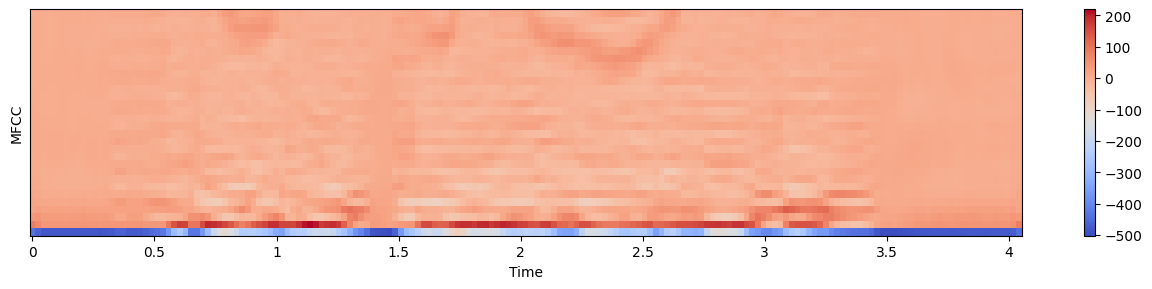

In [19]:
mfcc = librosa.feature.mfcc(y = data, sr = sr, n_mfcc = 30)

#MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
# displays the MFCC coefficients as an image, with time on the x-axis and MFCC index on the y-axis.
librosa.display.specshow(mfcc, x_axis = 'time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data, rate=sr)

In [20]:
# Noise
def noise(data):
    # generates random noise with an amplitude that is a fraction (0.035) of the maximum amplitude of the original data and adds it to the original data
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# Stretch
def stretch(data, rate=0.8):
    # slowing down the audio to 80% of its original duration
    return librosa.effects.time_stretch(data, rate=rate)

#Shift
def shift(data):
    # shifts the audio data by a random amount within the range of -5 to 5 milliseconds. It rolls the audio samples by a random shift range to the left or right. 
    shift_range=int(np.random.uniform(low=-5, high=5)*1000)
    return np.roll(data, shift_range)

#Pitch
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

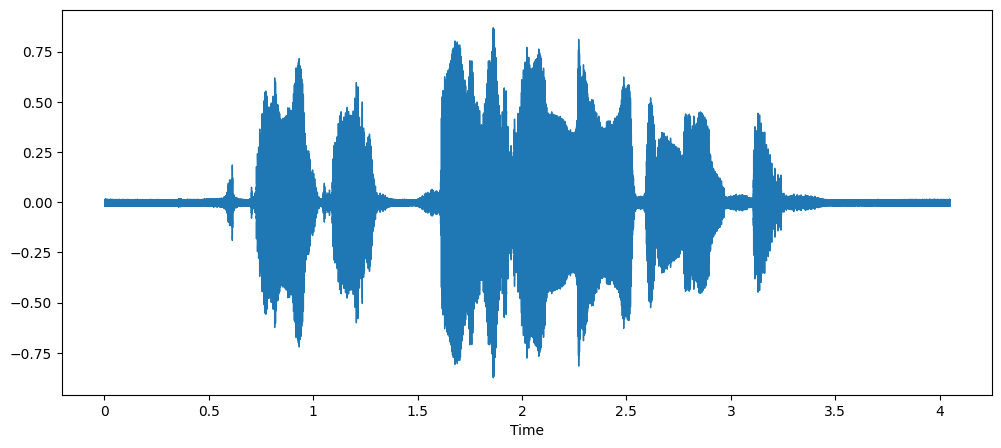

In [21]:
# Normal Audio

import librosa.display
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

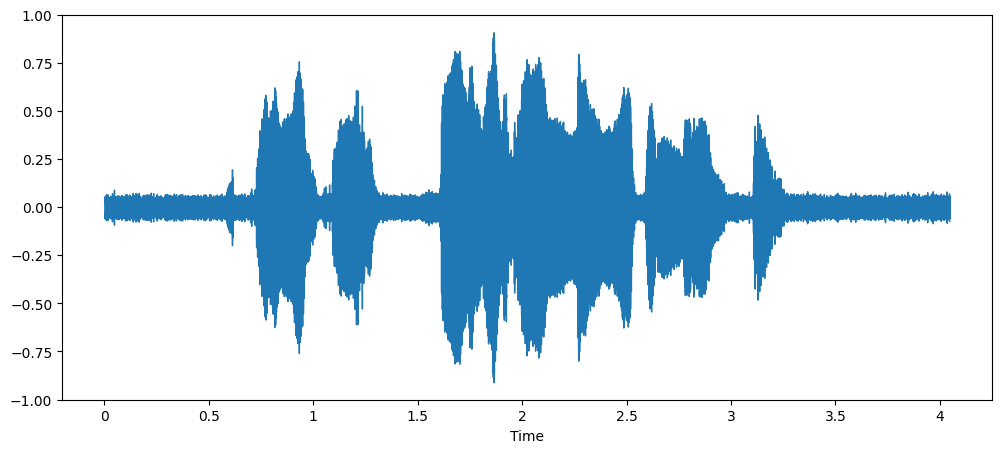

In [22]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

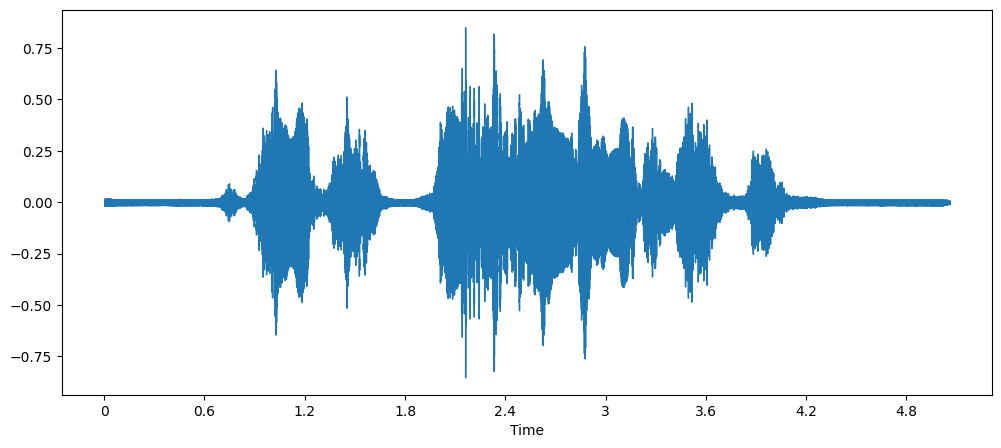

In [23]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

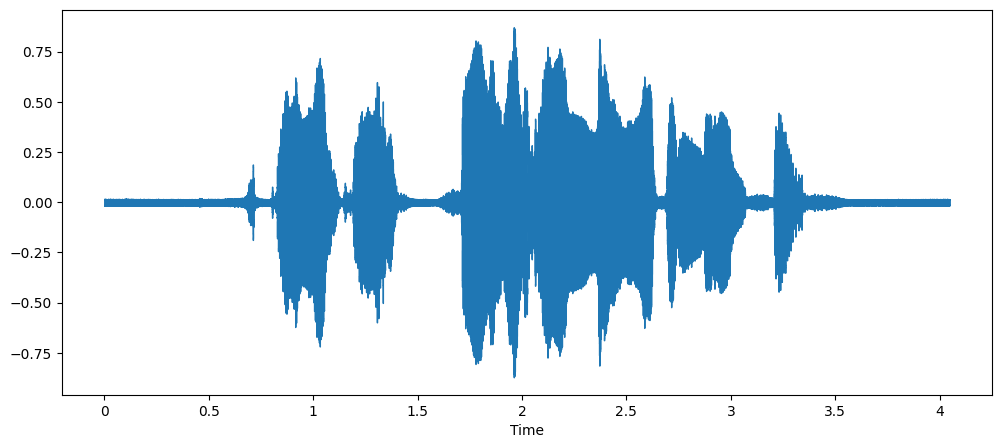

In [24]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

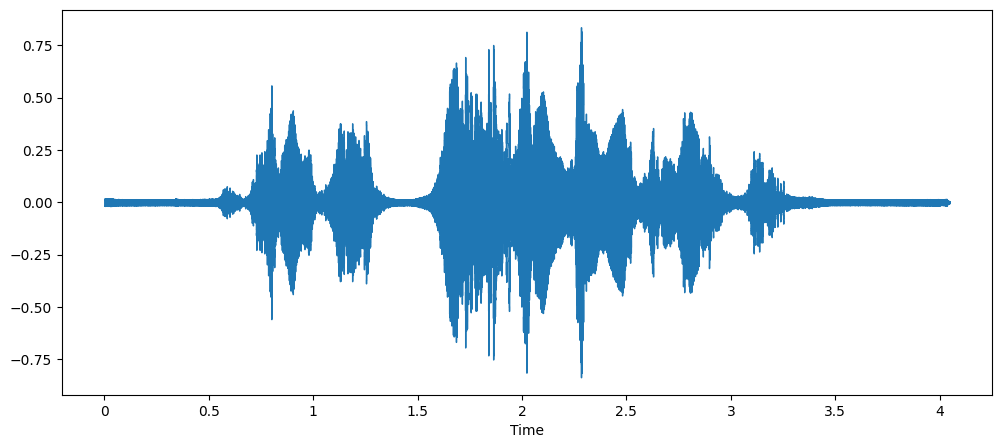

In [25]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [26]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio

In [27]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


In [28]:
from joblib import Parallel, delayed
import timeit

# Filter out rows with null entries
data_path_cleaned = data_path[data_path['Path'].notnull() & data_path['Emotions'].notnull()]

start = timeit.default_timer()
# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = data_path_cleaned.Path
emotions = data_path_cleaned.Emotions

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))

# Collect the results
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()

print('Time: ', stop - start)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Time:  577.8836621369999


In [29]:
len(X), len(Y), data_path.Path.shape

(46728, 46728, (12642,))

# Saving Features

In [30]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,-1.517690,-1.716483,-1.599310,-1.234609,-0.693198,-0.038982,0.675206,1.405603,2.112303,surprise
1,0.258789,0.390137,0.510742,0.508789,0.505859,0.495605,0.500000,0.488770,0.486328,0.485352,...,-7.611850,-4.472215,0.353965,-2.198825,0.716536,4.333623,-0.029430,-4.748728,-2.474032,surprise
2,0.304199,0.427246,0.540039,0.471191,0.387207,0.333008,0.282227,0.259277,0.258789,0.252930,...,0.518303,0.838663,1.308733,1.855111,2.405192,2.896439,3.283493,3.541682,3.667480,surprise
3,0.260742,0.376953,0.498535,0.467285,0.436035,0.412109,0.376953,0.369629,0.372070,0.370605,...,4.734493,5.129678,5.375941,4.574450,0.299020,-0.399755,-4.125106,-5.925064,-5.187788,surprise
4,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586417,2.746852,2.223276,0.986916,-0.730695,-2.530884,-4.002834,-4.849372,-4.929744,neutral


In [31]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,-1.517690,-1.716483,-1.599310,-1.234609,-0.693198,-0.038982,0.675206,1.405603,2.112303,surprise
1,0.258789,0.390137,0.510742,0.508789,0.505859,0.495605,0.500000,0.488770,0.486328,0.485352,...,-7.611850,-4.472215,0.353965,-2.198825,0.716536,4.333623,-0.029430,-4.748728,-2.474032,surprise
2,0.304199,0.427246,0.540039,0.471191,0.387207,0.333008,0.282227,0.259277,0.258789,0.252930,...,0.518303,0.838663,1.308733,1.855111,2.405192,2.896439,3.283493,3.541682,3.667480,surprise
3,0.260742,0.376953,0.498535,0.467285,0.436035,0.412109,0.376953,0.369629,0.372070,0.370605,...,4.734493,5.129678,5.375941,4.574450,0.299020,-0.399755,-4.125106,-5.925064,-5.187788,surprise
4,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586417,2.746852,2.223276,0.986916,-0.730695,-2.530884,-4.002834,-4.849372,-4.929744,neutral


In [32]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [33]:
Emotions = Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(46728, 2377)

In [34]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

# Data Preparation

In [35]:
X = Emotions.iloc[:,:-1].values
Y = Emotions['Emotions'].values

In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [37]:
print(Y.shape)
X.shape

(46728, 7)


(46728, 2376)

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2,shuffle=True)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((37382, 2376), (37382, 7), (9346, 2376), (9346, 7))

In [39]:
# scaling data using Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37382, 2376), (37382, 7), (9346, 2376), (9346, 7))

# CNN

In [40]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization, GRU
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [41]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [42]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [43]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((37382, 2376, 1), (37382, 7), (9346, 2376, 1), (9346, 7))

In [44]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [45]:
import tensorflow as tf
from tensorflow.keras import layers as L

model = tf.keras.Sequential([
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    
    L.Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Dropout(0.2),
    
    L.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),
    L.Dropout(0.2),
    
    L.Flatten(),
    L.Dense(256, activation='relu'),
    L.Dropout(0.3),
    
    L.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 256)         1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 1188, 256)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 128)         163968    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 594, 128)          0         
 g1D)                                                            
                                                                 
 dropout (Dropout)           (None, 594, 128)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 594, 64)           2

In [46]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/50
585/585 [==============================] - 23s 32ms/step - loss: 1.4516 - accuracy: 0.4264 - val_loss: 1.1995 - val_accuracy: 0.5320 - lr: 0.0010
Epoch 2/50
585/585 [==============================] - 18s 32ms/step - loss: 1.1521 - accuracy: 0.5433 - val_loss: 1.0364 - val_accuracy: 0.5842 - lr: 0.0010
Epoch 3/50
585/585 [==============================] - 18s 32ms/step - loss: 1.0191 - accuracy: 0.5967 - val_loss: 0.9515 - val_accuracy: 0.6332 - lr: 0.0010
Epoch 4/50
585/585 [==============================] - 18s 31ms/step - loss: 0.9102 - accuracy: 0.6446 - val_loss: 0.8447 - val_accuracy: 0.6727 - lr: 0.0010
Epoch 5/50
585/585 [==============================] - 18s 31ms/step - loss: 0.8025 - accuracy: 0.6895 - val_loss: 0.7999 - val_accuracy: 0.6891 - lr: 0.0010
Epoch 6/50
585/585 [==============================] - 18s 31ms/step - loss: 0.6978 - accuracy: 0.7303 - val_loss: 0.6651 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 7/50
585/585 [==============================] - 18s 

293/293 [==============================] - 2s 7ms/step - loss: 0.2132 - accuracy: 0.9416
Accuracy of our model on test data:  94.1579282283783 %


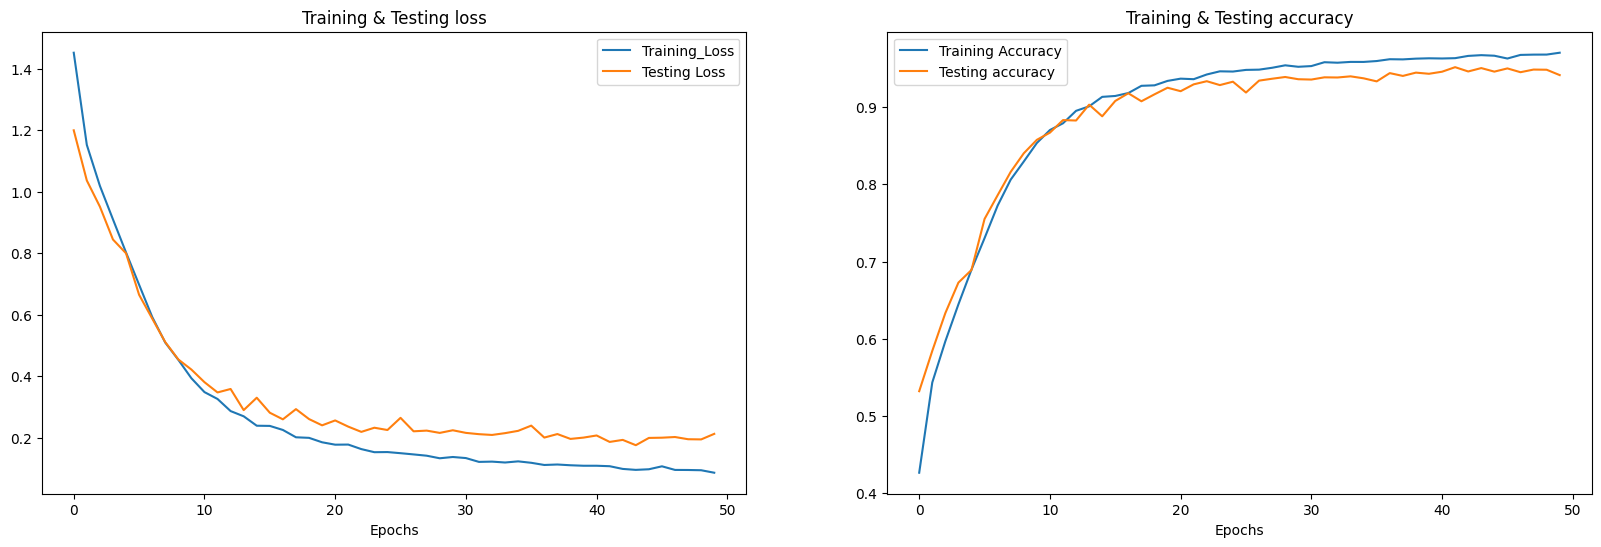

In [47]:
print("Accuracy of our model on test data: ", model.evaluate(x_testcnn, y_test)[1]*100, "%")

epochs = [i for i in range(50)]
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs,train_loss,label='Training_Loss')
ax[0].plot(epochs,test_loss, label = 'Testing Loss')
ax[0].set_title('Training & Testing loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs, train_acc, label = 'Training Accuracy')
ax[1].plot(epochs, test_acc, label = 'Testing accuracy')
ax[1].set_title('Training & Testing accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


# Hyperparameter Tuning

In [48]:
! pip install keras==2.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.6.0 which is incompatible.
tensorflowjs 4.15.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.


Training model with adam optimizer...
Training model with sgd optimizer...
Training model with rmsprop optimizer...


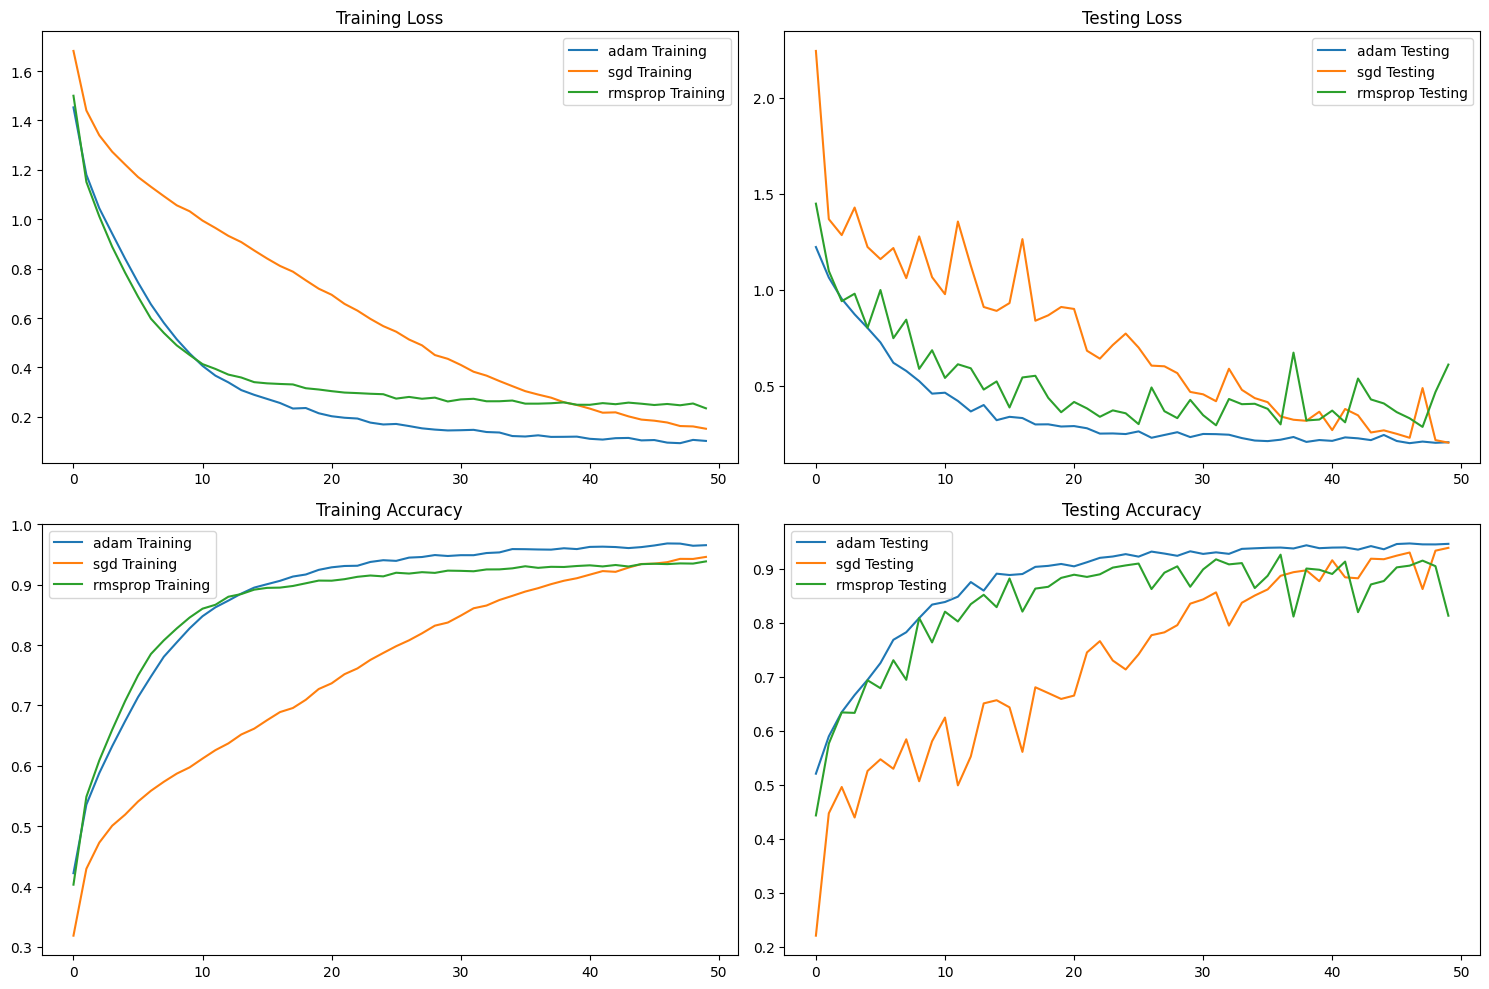

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# List of optimizers to compare
optimizers = ['adam', 'sgd', 'rmsprop']

# Dictionary to store training history for each optimizer
history_dict = {}

for optimizer in optimizers:
    print(f"Training model with {optimizer} optimizer...")
    
    # Create a new model for each optimizer
    model = tf.keras.Sequential([
        L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
        L.MaxPool1D(pool_size=5, strides=2, padding='same'),
        L.Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'),
        L.MaxPool1D(pool_size=5, strides=2, padding='same'),
        L.Dropout(0.2),
        L.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        L.MaxPool1D(pool_size=3, strides=2, padding='same'),
        L.Dropout(0.2),
        L.Flatten(),
        L.Dense(256, activation='relu'),
        L.Dropout(0.3),
        L.Dense(7, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model and store the training history
    history = model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64, verbose=0)
    
    # Store the training history in the dictionary
    history_dict[optimizer] = history

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, optimizer in enumerate(optimizers):
    # Plot training loss
    axes[0, 0].plot(history_dict[optimizer].history['loss'], label=f'{optimizer} Training')
    axes[0, 0].set_title('Training Loss')
    axes[0, 0].legend()

    # Plot testing loss
    axes[0, 1].plot(history_dict[optimizer].history['val_loss'], label=f'{optimizer} Testing')
    axes[0, 1].set_title('Testing Loss')
    axes[0, 1].legend()

    # Plot training accuracy
    axes[1, 0].plot(history_dict[optimizer].history['accuracy'], label=f'{optimizer} Training')
    axes[1, 0].set_title('Training Accuracy')
    axes[1, 0].legend()

    # Plot testing accuracy
    axes[1, 1].plot(history_dict[optimizer].history['val_accuracy'], label=f'{optimizer} Testing')
    axes[1, 1].set_title('Testing Accuracy')
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


Training model with categorical_crossentropy loss function...
Training model with mean_squared_error loss function...
Training model with kullback_leibler_divergence loss function...


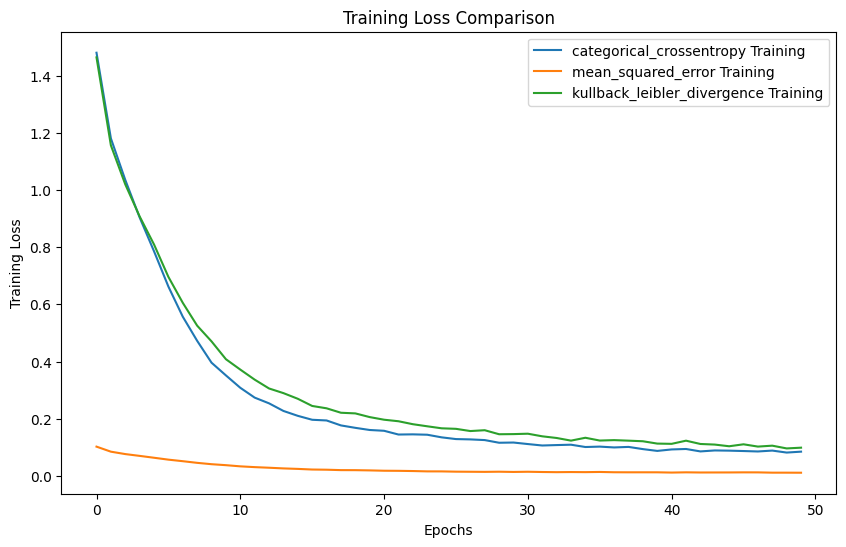

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# List of loss functions to compare
loss_functions = ['categorical_crossentropy', 'mean_squared_error', 'kullback_leibler_divergence']

# Dictionary to store training history for each loss function
history_dict = {}

for loss_func in loss_functions:
    print(f"Training model with {loss_func} loss function...")
    
    # Create a new model for each loss function
    model = tf.keras.Sequential([
        L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
        L.MaxPool1D(pool_size=5, strides=2, padding='same'),
        L.Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'),
        L.MaxPool1D(pool_size=5, strides=2, padding='same'),
        L.Dropout(0.2),
        L.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        L.MaxPool1D(pool_size=3, strides=2, padding='same'),
        L.Dropout(0.2),
        L.Flatten(),
        L.Dense(256, activation='relu'),
        L.Dropout(0.3),
        L.Dense(7, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss=loss_func, metrics=['accuracy'])
    
    # Train the model and store the training history
    history = model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64, verbose=0)
    
    # Store the training history in the dictionary
    history_dict[loss_func] = history

# Plotting the training loss
fig, ax = plt.subplots(figsize=(10, 6))

for loss_func in loss_functions:
    ax.plot(history_dict[loss_func].history['loss'], label=f'{loss_func} Training')

ax.set_title('Training Loss Comparison')
ax.set_xlabel('Epochs')
ax.set_ylabel('Training Loss')
ax.legend()
plt.show()


In [51]:
for loss_func in loss_functions:
    print(f"{loss_func} Training Loss:")
    for epoch, loss in enumerate(history_dict[loss_func].history['loss'], 1):
        print(f"Epoch {epoch}: {loss}")
    print()

categorical_crossentropy Training Loss:
Epoch 1: 1.4797394275665283
Epoch 2: 1.1803513765335083
Epoch 3: 1.0351845026016235
Epoch 4: 0.9038227796554565
Epoch 5: 0.7856483459472656
Epoch 6: 0.6621702313423157
Epoch 7: 0.5569278597831726
Epoch 8: 0.47257593274116516
Epoch 9: 0.39609506726264954
Epoch 10: 0.3516881465911865
Epoch 11: 0.30840274691581726
Epoch 12: 0.27402445673942566
Epoch 13: 0.25400859117507935
Epoch 14: 0.22743263840675354
Epoch 15: 0.21032452583312988
Epoch 16: 0.19656750559806824
Epoch 17: 0.19416718184947968
Epoch 18: 0.1768278032541275
Epoch 19: 0.16836732625961304
Epoch 20: 0.16084489226341248
Epoch 21: 0.1580808460712433
Epoch 22: 0.1449727565050125
Epoch 23: 0.1455840766429901
Epoch 24: 0.14429911971092224
Epoch 25: 0.13514164090156555
Epoch 26: 0.12908872961997986
Epoch 27: 0.12795493006706238
Epoch 28: 0.12557144463062286
Epoch 29: 0.11623995006084442
Epoch 30: 0.11698710173368454
Epoch 31: 0.11166803538799286
Epoch 32: 0.10662821680307388
Epoch 33: 0.108117207

In [45]:
! pip install --upgrade numpy

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/4b/d7/ecf66c1cd12dc28b4040b15ab4d17b773b87fa9d29ca16125de01adb36cd/numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 65.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you ha

In [59]:
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from bayes_opt import BayesianOptimization

# Function to create and compile the CNN model
def create_cnn_model(learning_rate, num_layers, num_filters, kernel_size, dropout_rate):
    model = Sequential()
    model.add(Conv1D(filters=int(num_filters), kernel_size=int(kernel_size), activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout_rate))

    for _ in range(int(num_layers)):
        model.add(Conv1D(filters=int(num_filters), kernel_size=int(kernel_size), activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    optimizer = Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define Bayesian optimization function
def bayesian_optimization(learning_rate, num_layers, num_filters, kernel_size, dropout_rate):
    model = create_cnn_model(learning_rate, num_layers, num_filters, kernel_size, dropout_rate)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define search space for hyperparameters
pbounds = {'learning_rate': (0.0001, 0.01),
           'num_layers': (1, 3),
           'num_filters': (16, 64),
           'kernel_size': (3, 5),
           'dropout_rate': (0.0, 0.5)}

# Run Bayesian optimization
optimizer = BayesianOptimization(f=bayesian_optimization, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_hyperparams = optimizer.max['params']
best_val_accuracy = optimizer.max['target']

print("Best Hyperparameters:")
print(best_hyperparams)
print("Best Validation Accuracy:", best_val_accuracy)


|   iter    |  target   | dropou... | kernel... | learni... | num_fi... | num_la... |
-------------------------------------------------------------------------------------
| 1         | 0.8528    | 0.1873    | 4.901     | 0.007347  | 44.74     | 1.312     |
| 2         | 0.8913    | 0.078     | 3.116     | 0.008675  | 44.85     | 2.416     |
| 3         | 0.8566    | 0.01029   | 4.94      | 0.008341  | 26.19     | 1.364     |
| 4         | 0.8446    | 0.0917    | 3.608     | 0.005295  | 36.73     | 1.582     |
| 5         | 0.7591    | 0.3059    | 3.279     | 0.002992  | 33.59     | 1.912     |
| 6         | 0.8653    | 0.003033  | 3.0       | 0.008682  | 46.47     | 3.0       |
| 7         | 0.8701    | 0.0       | 3.0       | 0.01      | 42.71     | 3.0       |
| 8         | 0.8108    | 0.04403   | 4.959     | 0.009871  | 21.55     | 1.164     |
| 9         | 0.7509    | 0.5       | 3.0       | 0.0001    | 40.25     | 1.0       |
| 10        | 0.6069    | 0.5       | 4.298     | 0.01

|   iter    |  target   | dropou... | kernel... | learni... | num_fi... | num_la... |
-------------------------------------------------------------------------------------
| 1         | 0.8522    | 0.1873    | 4.901     | 0.007347  | 44.74     | 1.312     |
| 2         | 0.8767    | 0.078     | 3.116     | 0.008675  | 44.85     | 2.416     |
| 3         | 0.8642    | 0.01029   | 4.94      | 0.008341  | 26.19     | 1.364     |
| 4         | 0.8513    | 0.0917    | 3.608     | 0.005295  | 36.73     | 1.582     |
| 5         | 0.7705    | 0.3059    | 3.279     | 0.002992  | 33.59     | 1.912     |
| 6         | 0.7765    | 0.3267    | 3.132     | 0.003189  | 43.21     | 2.837     |
| 7         | 0.7426    | 0.4532    | 3.211     | 0.001558  | 60.41     | 2.541     |
| 8         | 0.6984    | 0.292     | 3.096     | 0.0004545 | 21.02     | 1.466     |
| 9         | 0.8405    | 0.2343    | 4.986     | 0.009226  | 36.73     | 1.631     |
| 10        | 0.8484    | 0.0       | 3.588     | 0.01

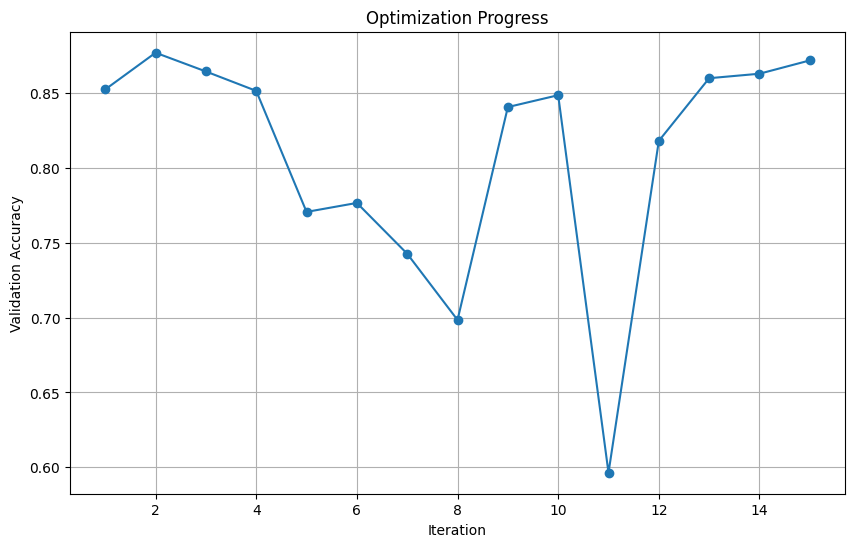

Best Hyperparameters:
{'dropout_rate': 0.07799726016810132, 'kernel_size': 3.116167224336399, 'learning_rate': 0.008675143843171858, 'num_filters': 44.853520563674024, 'num_layers': 2.416145155592091}
Best Validation Accuracy: 0.8767387270927429


In [60]:
import matplotlib.pyplot as plt

# Define a function to track the optimization progress
def plot_optimization_progress(optimizer):
    history = optimizer.res
    n_iterations = len(history)
    
    x = [i['target'] for i in history]
    y = [i for i in range(1, n_iterations+1)]

    plt.figure(figsize=(10, 6))
    plt.plot(y, x, marker='o', linestyle='-')
    plt.title('Optimization Progress')
    plt.xlabel('Iteration')
    plt.ylabel('Validation Accuracy')
    plt.grid(True)
    plt.show()

# Run Bayesian optimization
optimizer = BayesianOptimization(f=bayesian_optimization, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=10)

# Plot optimization progress
plot_optimization_progress(optimizer)

# Get the best hyperparameters
best_hyperparams = optimizer.max['params']
best_val_accuracy = optimizer.max['target']

print("Best Hyperparameters:")
print(best_hyperparams)
print("Best Validation Accuracy:", best_val_accuracy)
